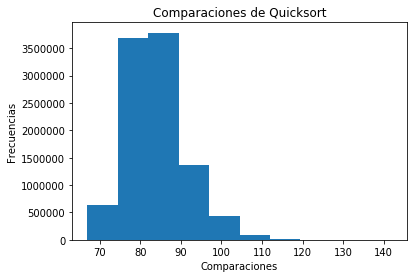

n: 16
Ejecuciones: 10000000
Tiempo ejecucion: 9.89 min.
Promedio Experimental: 83.6635861
Promedio Teorico: 64.0
Diferencia promedio: 19.663586100000003
Desviacion estandar: 7.0924674985646785
Probabilidad de tener 1.5 del tiempo teorico:  0.871496
minimo: 67
maximo: 142


In [5]:
import random
import statistics
import matplotlib.pyplot as plt
import math
import time


def randomquicksort(alist,times):
   comp = [0]
   randomquicksorthelper(alist,0,len(alist)-1,comp)
   times.append(comp[0])

def randomquicksorthelper(alist, first, last, comp):
    if first < last:
        r = randompartition(alist, first, last)
        splitpoint = r[0]
        tmp = comp.pop()
        comp.append(tmp + r[1])

        randomquicksorthelper(alist, first, splitpoint - 1, comp)
        randomquicksorthelper(alist, splitpoint + 1, last, comp)


def randompartition(alist, first, last):
    indxpiv = random.randint(first, last)
    temp = alist[indxpiv]
    alist[indxpiv] = alist[first]
    alist[first] = temp

    pivotvalue = alist[first]
    compspart = 0

    leftmark = first + 1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1
            compspart = compspart + 1
        compspart = compspart + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark - 1
            compspart = compspart + 1
        compspart = compspart + 1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp

    return rightmark, compspart


def randomquicksorttimedistrib(s, r):
    # Create an array of 1 .. n
    n = s
    runs = r
    x = []
    for i in range(1, n + 1):
        x.append(n + 1 - i)

    # Run quicksort for each permutation
    starting_point = time.time()
    tlist = []
    for p in range(1, runs + 1):
        y = list(x)
        randomquicksort(y, tlist)
    elapsed_time = time.time() - starting_point

    plt.hist(tlist)
    plt.title("Comparaciones de Quicksort")
    plt.xlabel("Comparaciones")
    plt.ylabel("Frecuencias")
    plt.show()

    print("n:", n)
    print("Ejecuciones:", runs)
    print("Tiempo ejecucion:","{0:.2f}".format(elapsed_time/60)+" min.")
    print("Promedio Experimental:", statistics.mean(tlist))
    print("Promedio Teorico:", n*math.log2(n))
    print("Diferencia promedio:", statistics.mean(tlist)-n*math.log2(n))
    print("Desviacion estandar:", statistics.stdev(tlist))
    print("Probabilidad de tener 1.5 del tiempo teorico: ","{0:.6f}".format(statistics.mean(tlist)/(n*math.log2(n)*1.5)))
    print("minimo:", min(tlist))
    print("maximo:", max(tlist))

randomquicksorttimedistrib(16,10000000)

In [ ]:
Numero de pruebas  Tiempo ejecucion 
10000000           9.89 minutos
33336706.7411      300 minutos = 5 horas